#**Data Science Engineering Methods and Tools**

## **Assignment 1** – Machine Learning Data Cleaning and Feature Selection

**Name** - Kinjal Vinod Thakkar

**Nuid** - 001568960

**Abstract**

An Insurance Company should be able to identify prospective Auto Insurance holders from within its existing pool of health Insurance holders. Successful cross selling efforts could also strengthen the brand’s image and position in the Insurance market.Auto Insurance has slowly made its name as the most profitable insurance sold in the market owing to increasing no of vehicle owners and raising awareness of the benefits offered by vehicle insurances, to cover expensive repairs or damages due to accidents. However, searching for prospective insurance buyers could be a very laborious and costly process for any company.The aim of the Notebook is to use the records of all existing Health Insurance holders that could be potential Vehicle Insurance buyers based on their profile.


**Data Set Description** 

* id: Unique ID for the customer

* Gender: Gender of the customer

* Age: Age of the customer

* Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL

* Region_Code: Unique code for the region of the customer

* Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

* Vehicle_Age: Age of the Vehicle

* Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

* Annual_Premium: The amount customer needs to pay as premium in the year

* PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* Vintage: Number of Days, Customer has been associated with the company

* Response: 1 : Customer is interested, 0 : Customer is not interested


**1. Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

**2. Data Loading**

**2.1 Reading the data**


In [ ]:
#Data is stored in the github account
data = pd.read_csv('https://raw.githubusercontent.com/kinjalthakkar1408/DataScienceFall2021/master/train.csv')

In [ ]:
#Seeing the data in the file
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**3. Descriptive Statistics**

In [ ]:
#Displaying the number of rows and number of columns in the DataFrame
data.shape

(381109, 12)

In [ ]:
#information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#Generates descriptive statistics of DataFrame columns.
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Question : What are the distributions of the predictor variables?  

**4. Analysis Techniques**

* 4.1 Univariate Analysis - Histogram

A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal. It can also show any outliers or gaps in the data. In brief, a histogram summarizes the distribution properties of a continuous numerical variable.

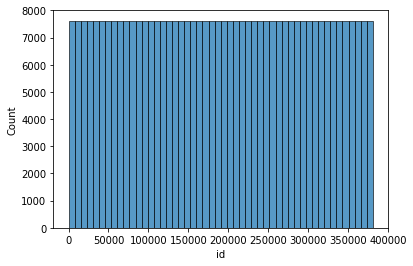

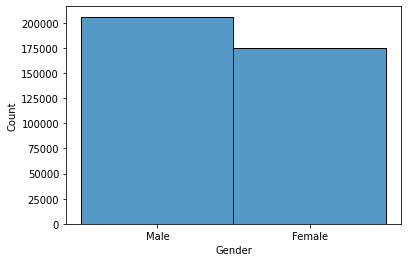

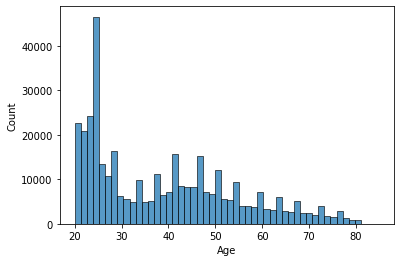

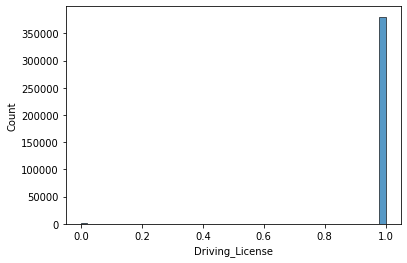

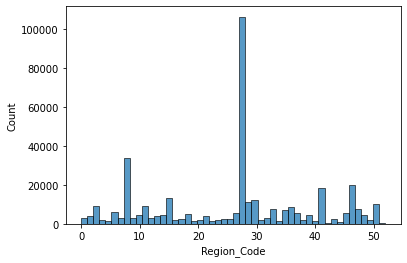

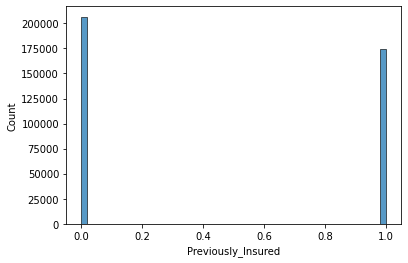

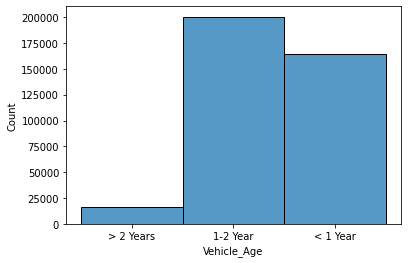

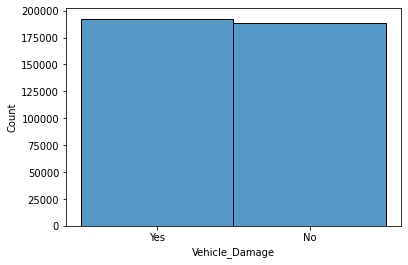

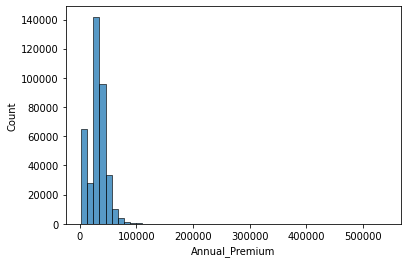

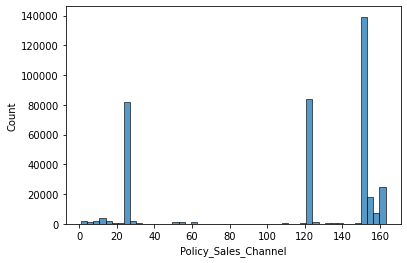

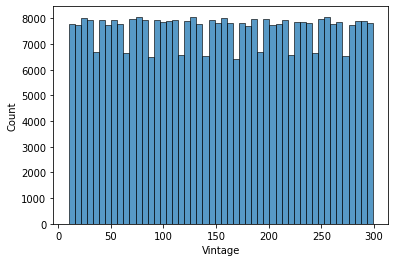

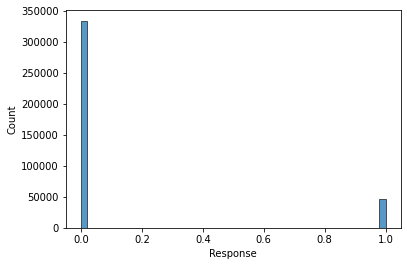

In [ ]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.histplot(data[col],bins=50)

Inference :

* For id , the distribution is uniform.

* For age, the distribution is right skewed.

* For gender, the distribution is bimodal.

* For previously_insured, gender,driving_license, responsse have binary values 1 or 0.

* For Vintage, the distribution is uniform.

* Annual_Premium is right skewed.

* Vehicle_Age is left Skewed.

* Policy_Sales_Channel is multimodal.

**4.2 Bivariate Analysis- Pair Plot**

A pairs plot allows us to see both distribution of single variables and relationships between two variables


<Figure size 720x720 with 0 Axes>

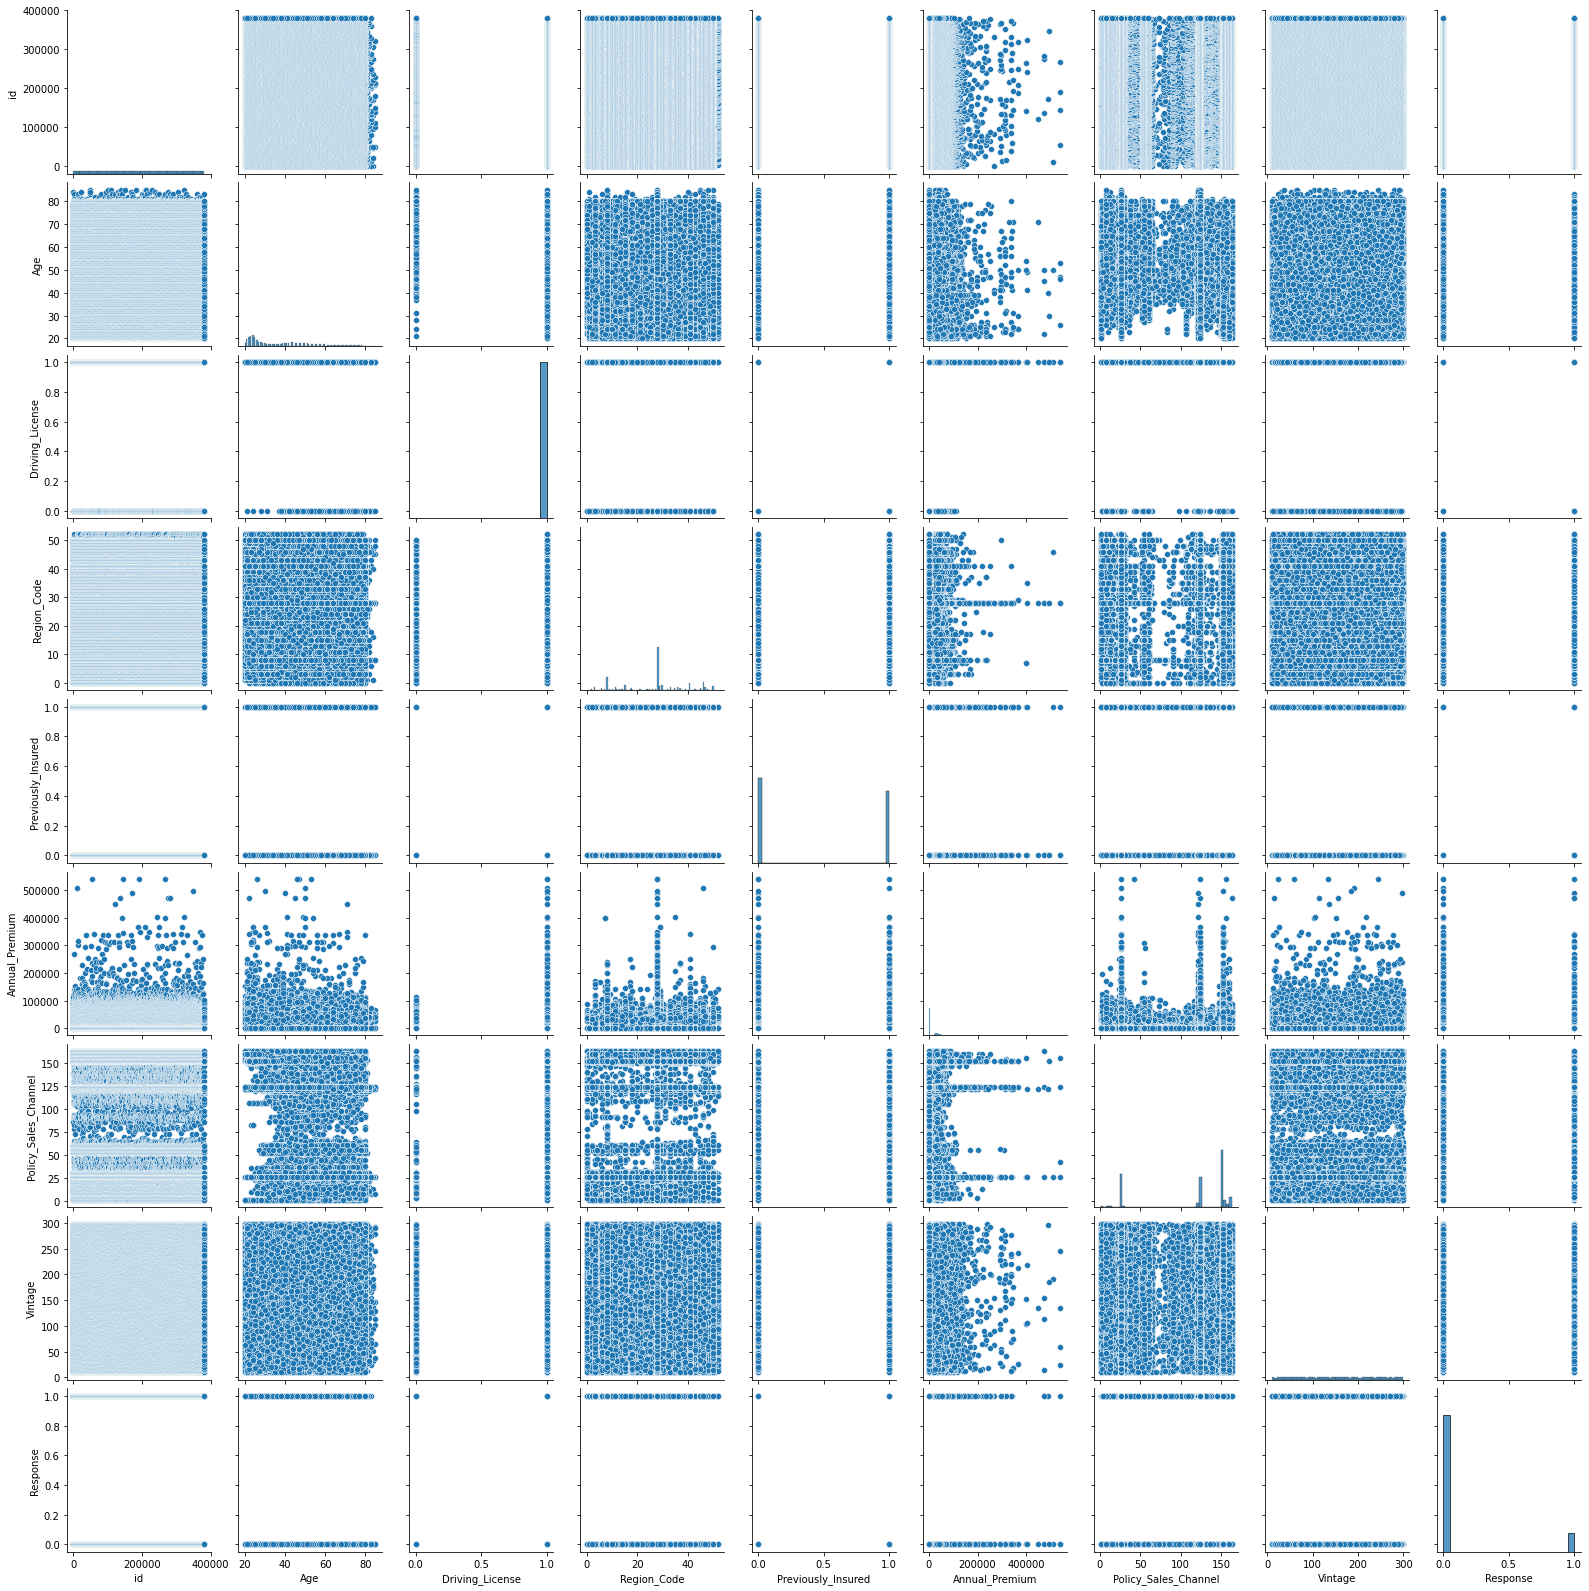

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

**5. Data Preprocessing**

**5.1 Displaying Null Values**

In [ ]:
#Displaying the null values
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Question : Which independent variables have missing data? How much? 

* Result : There are no null values in the data set.

**5.2 Converting Categorical Values to Numerical Values**

**Method 1 :**

**5.2.1 Assigning the values for encoding**

* Gender

    Male = 0

    Female = 1

* Vehicle Damage

    Yes = 1

    No = 0


In [ ]:
#Assigning the values for encoding
data['Gender'] = data.Gender.map({'Male':0, 'Female':1})
data['Vehicle_Damage'] = data.Vehicle_Damage.map({'No':0, 'Yes':1})
data.head(20)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0
5,6,1,24,1,33.0,0,< 1 Year,1,2630.0,160.0,176,0
6,7,0,23,1,11.0,0,< 1 Year,1,23367.0,152.0,249,0
7,8,1,56,1,28.0,0,1-2 Year,1,32031.0,26.0,72,1
8,9,1,24,1,3.0,1,< 1 Year,0,27619.0,152.0,28,0
9,10,1,32,1,6.0,1,< 1 Year,0,28771.0,152.0,80,0


**Method 2 :**

**5.2.2 Finding Unique Values**

In [ ]:
#Displaying the unique values in the column -"Vehicle_Age"
data.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

**5.2.3 One Hot Encoding Technique**

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['Vehicle_Age']]).toarray())
enc_df
enc_df.columns = ['> 2 Years','1-2 Year','< 1 Year'] 

enc_df.apply(np.int64)
data =data.join(enc_df)
data=data.drop(['Vehicle_Age'],axis=1)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,1,0,44,1,28.0,0,1,40454.0,26.0,217,1,0.0,0.0,1.0
1,2,0,76,1,3.0,0,0,33536.0,26.0,183,0,1.0,0.0,0.0
2,3,0,47,1,28.0,0,1,38294.0,26.0,27,1,0.0,0.0,1.0
3,4,0,21,1,11.0,1,0,28619.0,152.0,203,0,0.0,1.0,0.0
4,5,1,29,1,41.0,1,0,27496.0,152.0,39,0,0.0,1.0,0.0


Question : Do the ranges of the predictor variables make sense?

**5.2.3 Finding Range and Box Plot**

* Range

In [ ]:
#finding Range
d_range= data.max()-data.min()
d_range

id                      381108.0
Gender                       1.0
Age                         65.0
Driving_License              1.0
Region_Code                 52.0
Previously_Insured           1.0
Vehicle_Damage               1.0
Annual_Premium          537535.0
Policy_Sales_Channel       162.0
Vintage                    289.0
Response                     1.0
> 2 Years                    1.0
1-2 Year                     1.0
< 1 Year                     1.0
dtype: float64

* Box Plot

Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.The box plot shape will show if a statistical data set is normally distributed or skewed.

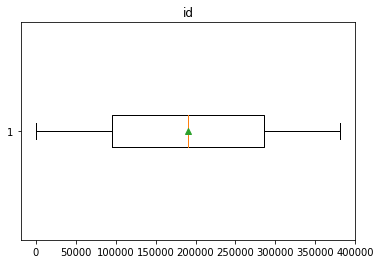

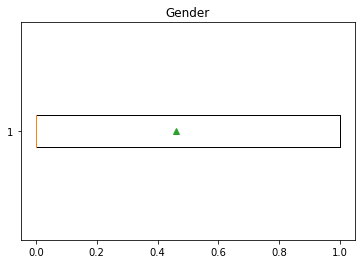

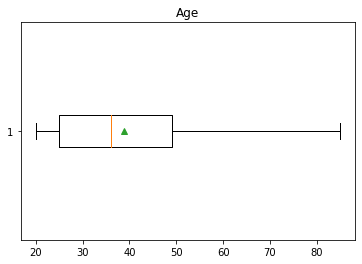

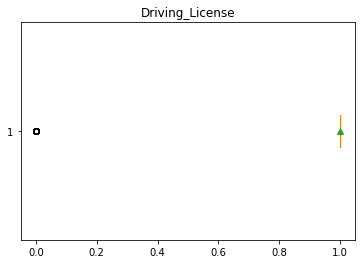

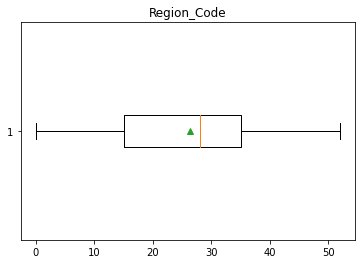

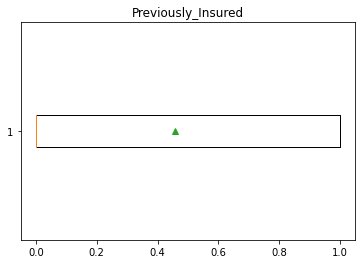

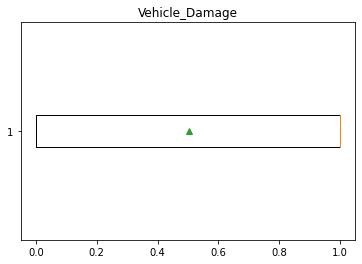

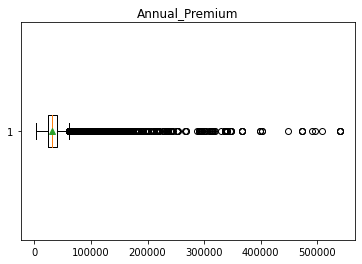

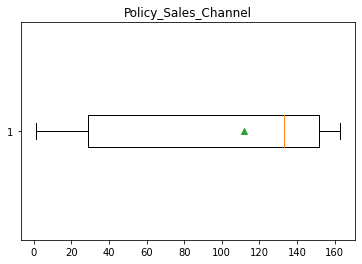

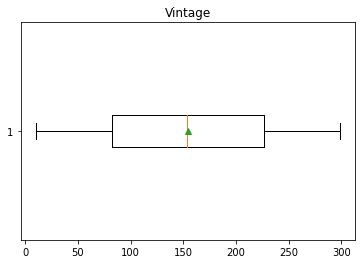

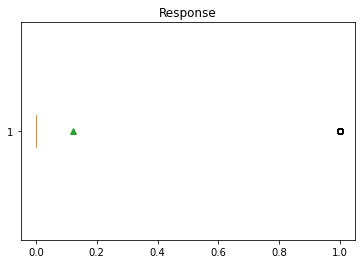

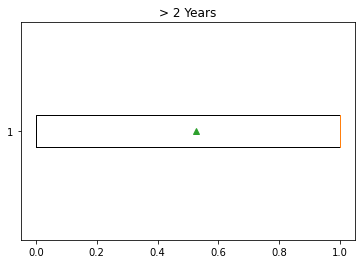

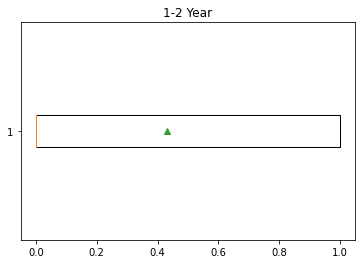

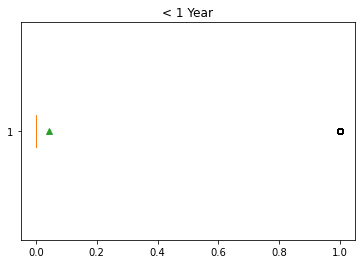

In [ ]:
#BoxPlot
for i, col in enumerate(data.columns):
    plt.figure(i)
    plt.title(col)
    plt.boxplot(data[col], vert=False, showmeans=True)

Inference :  From the above diagrams its clear that the variables - Driving_License,Annual_Premium, Response and  < 1 Year have outliers.

**6. Implementing Normalisation**

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.It is required only when features have different ranges.

In [ ]:
#Dropping Id column
columns = data[["id"]]
data.drop(columns, inplace=True, axis=1)
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0.0,0.0,1.0
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1.0,0.0,0.0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0.0,0.0,1.0
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,0.0,1.0,0.0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,0.0,1.0,0.0


In [ ]:
# Normalizing the data in the Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage columns because the value is too high when compared to independent variable
from sklearn import preprocessing


x = data[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']] = pd.DataFrame(x_scaled)

In [ ]:
#looking at data head after nromalizing
data.head(20)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,0,0.369231,1,0.538462,0,1,0.070366,0.154321,0.716263,1,0.0,0.0,1.0
1,0,0.861538,1,0.057692,0,0,0.057496,0.154321,0.598616,0,1.0,0.0,0.0
2,0,0.415385,1,0.538462,0,1,0.066347,0.154321,0.058824,1,0.0,0.0,1.0
3,0,0.015385,1,0.211538,1,0,0.048348,0.932099,0.667820,0,0.0,1.0,0.0
4,1,0.138462,1,0.788462,1,0,0.046259,0.932099,0.100346,0,0.0,1.0,0.0
5,1,0.061538,1,0.634615,0,1,0.000000,0.981481,0.574394,0,0.0,1.0,0.0
6,0,0.046154,1,0.211538,0,1,0.038578,0.932099,0.826990,0,0.0,1.0,0.0
7,1,0.553846,1,0.538462,0,1,0.054696,0.154321,0.214533,1,1.0,0.0,0.0
8,1,0.061538,1,0.057692,1,0,0.046488,0.932099,0.062284,0,0.0,1.0,0.0
9,1,0.184615,1,0.115385,1,0,0.048631,0.932099,0.242215,0,0.0,1.0,0.0


**7. Median**

In [ ]:
data.median()

Gender                  0.000000
Age                     0.246154
Driving_License         1.000000
Region_Code             0.538462
Previously_Insured      0.000000
Vehicle_Damage          1.000000
Annual_Premium          0.054023
Policy_Sales_Channel    0.814815
Vintage                 0.498270
Response                0.000000
> 2 Years               1.000000
1-2 Year                0.000000
< 1 Year                0.000000
dtype: float64

**7. Mode**

In [ ]:
data.mode()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,0,0.061538,1,0.538462,0,1,0.0,0.932099,0.851211,0,1.0,0.0,0.0


**8. Mean**

In [ ]:
data.mean()

Gender                  0.459239
Age                     0.289578
Driving_License         0.997869
Region_Code             0.507477
Previously_Insured      0.458210
Vehicle_Damage          0.504877
Annual_Premium          0.051968
Policy_Sales_Channel    0.685397
Vintage                 0.499472
Response                0.122563
> 2 Years               0.525613
1-2 Year                0.432385
< 1 Year                0.042001
dtype: float64

**9. Finding the correlation between all the features in the data Using Heat Maps**

The correlation coefficient has values between -1 to 1:
 * A value closer to 0 indicates weaker correlation
 * A value closer to 1 indicates stronger positive correlation
 * A value closer to -1 indicates stronger negative correlation

Note : Exact 0 implying no correlation



In [ ]:
#Finding Correlation
data.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
Gender,1.000000,-0.145545,0.018374,-0.000604,0.081932,-0.091606,-0.003673,0.111159,0.002517,-0.052440,-0.147633,0.166280,-0.043155
Age,-0.145545,1.000000,-0.079782,0.042574,-0.254682,0.267534,0.067507,-0.577826,-0.001264,0.111147,0.692910,-0.787775,0.220694
Driving_License,0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.016622,-0.011906,0.043731,-0.000848,0.010155,-0.037403,0.040215,-0.006211
Region_Code,-0.000604,0.042574,-0.001081,1.000000,-0.024659,0.028235,-0.010588,-0.042420,-0.002750,0.010570,0.038055,-0.044250,0.014555
Previously_Insured,0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.824143,0.004269,0.219381,0.002537,-0.341170,-0.279077,0.358773,-0.191352
Vehicle_Damage,-0.091606,0.267534,-0.016622,0.028235,-0.824143,1.000000,0.009349,-0.224377,-0.002064,0.354400,0.284717,-0.370778,0.206961
Annual_Premium,-0.003673,0.067507,-0.011906,-0.010588,0.004269,0.009349,1.000000,-0.113247,-0.000608,0.022575,-0.002495,-0.022555,0.061918
Policy_Sales_Channel,0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.224377,-0.113247,1.000000,0.000002,-0.139042,-0.508265,0.571516,-0.146238
Vintage,0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.002064,-0.000608,0.000002,1.000000,-0.001050,-0.002632,0.002410,0.000600
Response,-0.052440,0.111147,0.010155,0.010570,-0.341170,0.354400,0.022575,-0.139042,-0.001050,1.000000,0.164317,-0.209878,0.109300


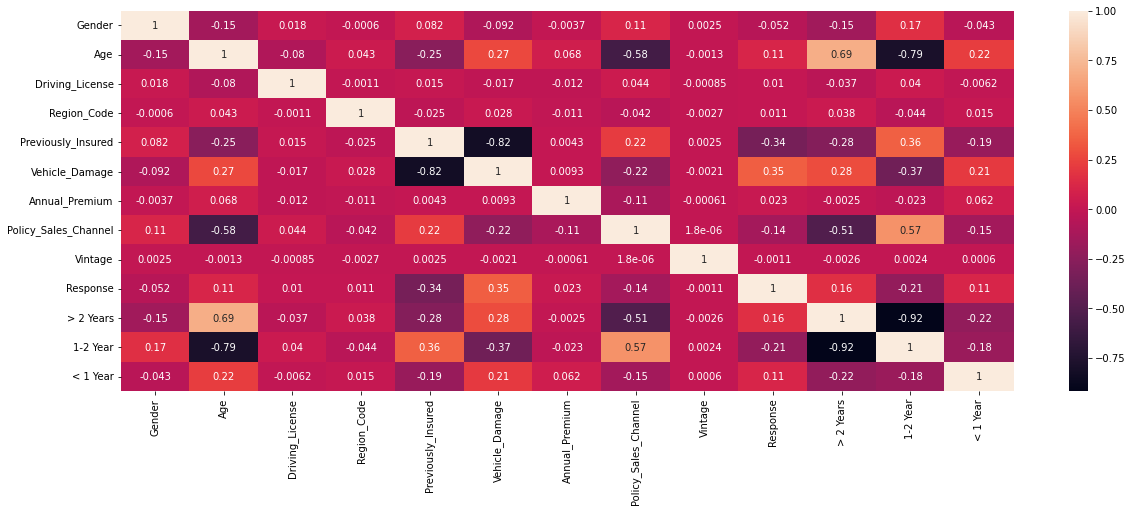

In [ ]:
#plotting the heat map of the correlation
plt.figure(figsize = (20,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

 Question : Is the predictor variables independent of all the other predictor variables?

* Inference : We will only select features which has the highest correlation and close with respect to target variable. Columns like Age , Vehicle_Damage, Vehicle_Age which is > 2 years and Vehicle_Age which is < 1 year are the most significant factors to predict whether the customer would take a vehicle insurance or not.That is they are highly correlated.  Here Vehicle_Age is the most correlated with the value 0.35

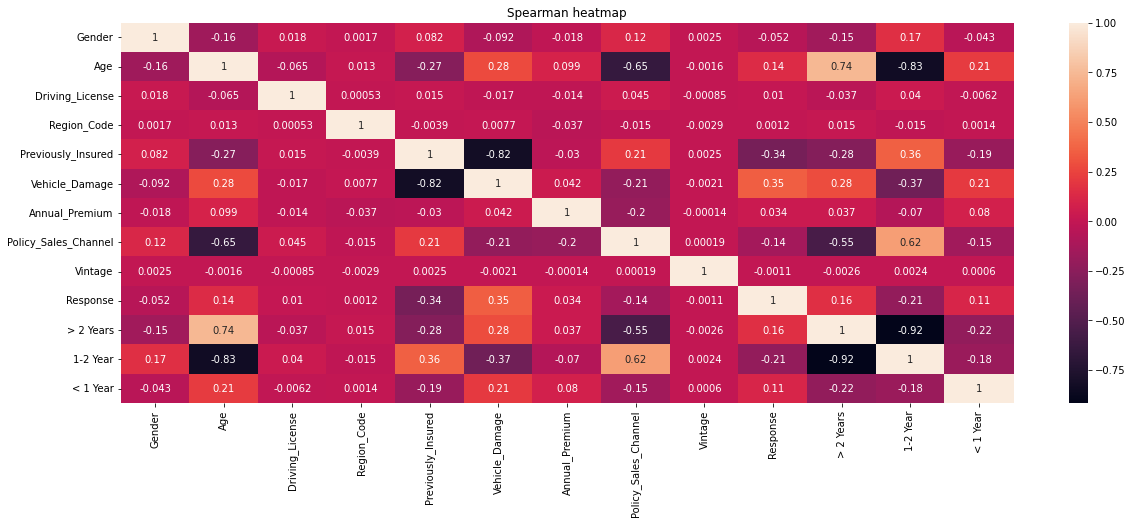

In [ ]:
#Spearman heatmap
corr = data.corr() 
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data.corr(method='spearman'), annot = True)
plt.title("Spearman heatmap")
plt.show()

**10. Ordinary Least Squares**

Ordinary Least Squares (OLS) is the most common estimation method for linear models

**10.1 Using OLS for finding the p value and t statistics**

In [ ]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage','> 2 Years','1-2 Year','< 1 Year']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5937.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:42:08   Log-Likelihood:                -88269.
No. Observations:              381109   AIC:                         1.766e+05
Df Residuals:                  381098   BIC:                         1.767e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0081      0.001     -8.083      0.000      -0.010      -0.006
Age                     -0.2013      0.004    -57.162      0.000      -0.208      -0.194
Driving_License          0.0923      0.011      8.579      0.000       0.071       0.113
Region_Code             -0.0011      0.002     -0.578      0.563      -0.005       0.003
Previously_Insured      -0.1932      0.001   -179.504      0.000      -0.195      -0.191
Annual_Premium           0.2250      0.016     14.428      0.000       0.194       0.256
Policy_Sales_Channel    -0.0431      0.002    -23.046      0.000      -0.047      -0.039
Vintage              -2.074e-05      0.002     -0.012      0.990      -0.003       0.003
> 2 Years                0.2494      0.011     22.346      0.000       0.228       0.271
1-2 Year                 0.1270      0.011     11.456      0.000       0.105       0.149
< 1 Year                 0.3204      0.011     27.916      0.000       0.298       0.343
==============================================================================
Omnibus:                   111992.594   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251586.723
Skew:                           1.730   Prob(JB):                         0.00
Kurtosis:                       4.969   Cond. No.                         77.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**10.2 OLS after removing insignificant feature  "Region Code" , "Vintage"**

In [ ]:
#Removing the insignificant values
##Reason :  If the p-value is equal to 0.05 (5%), the data in the table is significant. If it is less than 0.05 (5%), the data is highly significant. Hence it is important to eliminate the insignificant values

model = sm.OLS(data['Response'], data[['Gender', 'Age', 'Driving_License','Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel','> 2 Years','1-2 Year','< 1 Year']]).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     7421.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:42:14   Log-Likelihood:                -88270.
No. Observations:              381109   AIC:                         1.766e+05
Df Residuals:                  381100   BIC:                         1.767e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0081      0.001     -8.088      0.000      -0.010      -0.006
Age                     -0.2013      0.004    -57.169      0.000      -0.208      -0.194
Driving_License          0.0923      0.011      8.579      0.000       0.071       0.113
Previously_Insured      -0.1931      0.001   -179.507      0.000      -0.195      -0.191
Annual_Premium           0.2251      0.016     14.438      0.000       0.195       0.256
Policy_Sales_Channel    -0.0431      0.002    -23.039      0.000      -0.047      -0.039
> 2 Years                0.2488      0.011     22.452      0.000       0.227       0.271
1-2 Year                 0.1264      0.011     11.484      0.000       0.105       0.148
< 1 Year                 0.3198      0.011     28.055      0.000       0.297       0.342
==============================================================================
Omnibus:                   111992.666   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251586.860
Skew:                           1.730   Prob(JB):                         0.00
Kurtosis:                       4.969   Cond. No.                         70.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Question : Which predictor variables are the most important? 

Question : Which independent variables are useful to predict a target (dependent variable)?

* Inference : OLS helps to eliminate the variables (Columns) that are insignificant. Here columns like Gender, Age, Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,> 2 Years,1-2 Year,< 1 Year are most significant. This indicates that the above mentioned variables are most important in the data set and are useful to predict a target variable.

**11. Splitting the data into Train Set and Test Set**

Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. 

Here Data is split into 2 parts

Taining data set = 80%

Test data set = 20%



In [ ]:
X = data[ ['Gender', 'Age', 'Driving_License','Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel','Vintage','> 2 Years','1-2 Year','< 1 Year']]

y = data['Response']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,> 2 Years,1-2 Year,< 1 Year
15781,1,0.061538,1,0.711538,0,0.031295,0.932099,0.179931,0.0,1.0,0.0
54233,1,0.461538,1,0.000000,0,0.000000,0.746914,0.318339,1.0,0.0,0.0
242099,1,0.046154,1,0.750000,1,0.044578,0.932099,0.328720,0.0,1.0,0.0
130366,1,0.569231,1,0.057692,1,0.000000,0.141975,0.470588,1.0,0.0,0.0
308826,0,0.030769,1,0.788462,1,0.000000,0.932099,0.532872,0.0,1.0,0.0


**11.1 Histogram for X_train**

<function matplotlib.pyplot.show>

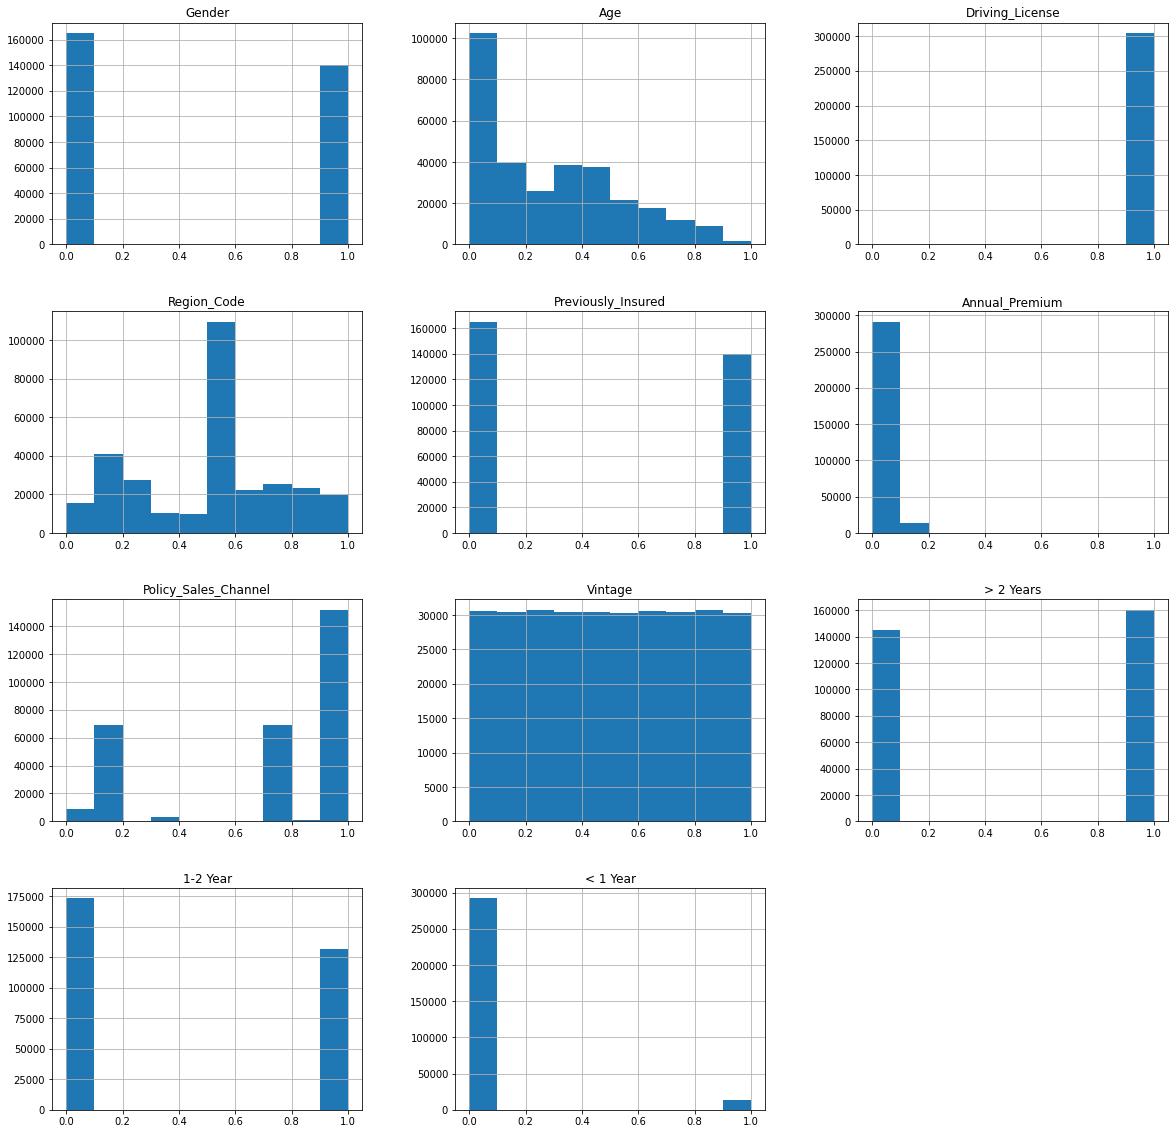

In [ ]:
X_train.hist(figsize=(20,20))
plt.show

**11.2 Histogram for X_test**

<function matplotlib.pyplot.show>

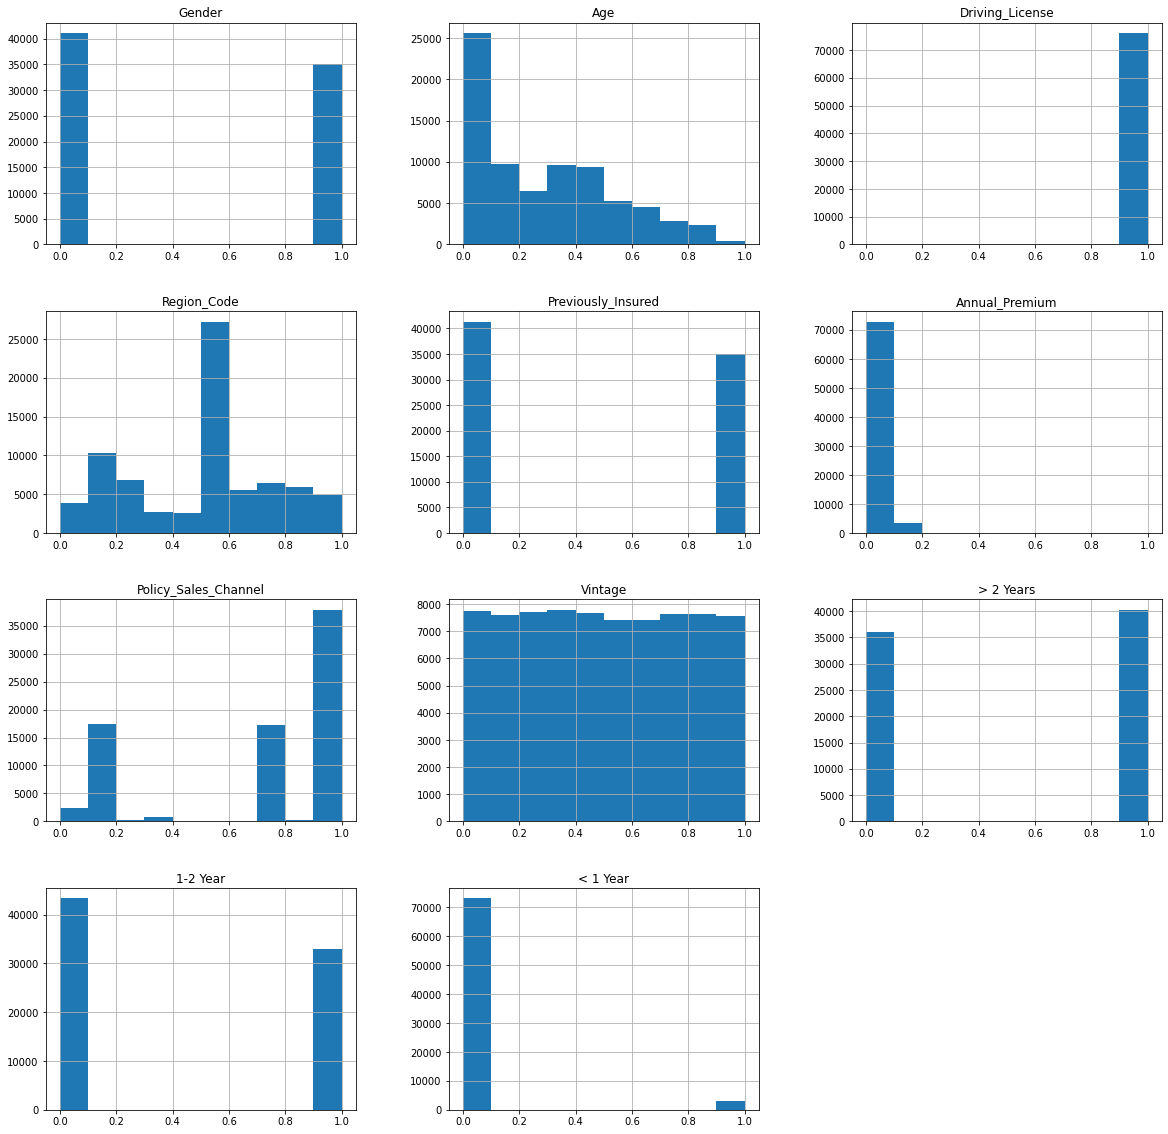

In [ ]:
X_test.hist(figsize=(20,20))
plt.show

**11.3 Histogram for y_train**

<function matplotlib.pyplot.show>

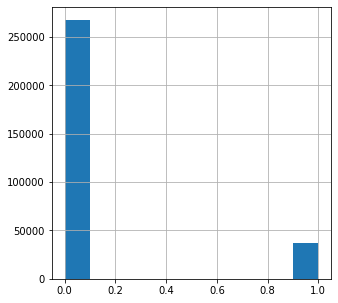

In [ ]:
y_train.hist(figsize=(5,5))
plt.show

**11.4 Histogram for y_test**

<function matplotlib.pyplot.show>

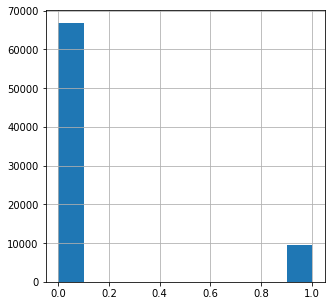

In [ ]:
y_test.hist(figsize=(5,5))
plt.show

Question : Do the training and test sets have the same data?

* Inference : From the above histograms for respective X_train, X_test, y_train and y_test , it indicates that X_train and X_test have similar data. Also y_test and y_train have similar data.

**12. Conclusion**

From the above analysis, its clear that Gender, Age, Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vehicle_Age (> 2 Years,1-2 Year,< 1 Year) are most significant variables and the most important in the data set.They are useful to predict a target variable.Also these variables help to predict whether the existing Health Insurance holders would buy Vehicle Insurance or not.

**13. References**

* https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

* Scikit learn offcial documentation

* Machine Learning with scikit-learn Quick Start Guide - by Kevin Jolly

* Refered Towards Data Science

The algorithms were referred directly from the Scikit learn official documentation. Grid Search and the Randomized search for hyperparameter training referred to towards dataScience. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide. The reaming code was written independently.

Copyright 2021 Kinjal Vinod Thakkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.